# Basic Stats

## Descriptive Statistics
These statistical measures describe your dataset and provide you with insights.

- mean: average value, sensitive to outliers
- median: p50, middle value, robust to outliers
- mode: most frequent value.
- Variance: measure of spread, (sum of x - mean of x) / n-1 (n - 1 is bessels correction for a more accurate estimate of popluation variance.)
- Standard deviation: measure of spread, same units as original data, easier to interpret. root of variance
- range: measure of spread, min - max
- skewness: asymmetry of data 
- Kurtosis: heavyness of tails, high = lots of outliers
- z-score: number of standard deviation a data point is from the mean. (x - mean of x) / s.d.

In [2]:
import pandas as pd
boston = pd.read_csv('../data/Boston.csv')
house_prices = boston['medv']
mean = house_prices.mean()
median = house_prices.median()
mode = house_prices.mode()
print(f"Mean: {mean}, Median: {median}, Mode: {mode[0]}")
std_dev = house_prices.std()
variance = house_prices.var()
print(f"Standard Deviation: {std_dev}, Variance: {variance}")
quartiles = house_prices.quantile([0.25, 0.5, 0.75])
print(f"Quartiles:\n{quartiles}")
iqr = quartiles[0.75] - quartiles[0.25]
print(f"Interquartile Range (IQR): {iqr}")
sum_z_scores = ((house_prices - mean) / std_dev).sum()
print(f"Sum of Z-scores: {sum_z_scores}")


Mean: 22.532806324110677, Median: 21.2, Mode: 50.0
Standard Deviation: 9.197104087379818, Variance: 84.58672359409856
Quartiles:
0.25    17.025
0.50    21.200
0.75    25.000
Name: medv, dtype: float64
Interquartile Range (IQR): 7.975000000000001
Sum of Z-scores: -2.7711166694643907e-13


## Probability Distributions

These describe how data is likely to behave.

- Normal (gaussian) - continious, bell curve, approximating binomal or poisson when average is large.
- Binomial - discrete, fixed trials and each trial has 2 outcomes, each trail has the same prob of success p (flip a coin 20 times). P(x=10), P(x<10)
- Poisson - counts over time (number of events in a fixed interval), events occur independently at a constant average rate and there is no upper limit on the number of events.
- Uniform: equal prob on each outcome, e.g fair dice

### checking for normal distribution

1. do the eye test, plot a histogram.
2. check for skewness, 0 = perfect symetry = normal. > 0 is positive skew, < 0 is negative skew
    -  0 – 0.5: Fairly symmetric (≈ normal)
    - 0.5 – 1: Moderate skew (some deviation)
    - greater than 1: Highly skewed (not normal)
3. to confim see kutosis:
    - kurtosis: measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.
    - Positive kurtosis (kurtosis > 0) means heavier tails and a more peaked distribution.
Negative kurtosis (kurtosis < 0) means lighter tails and a flatter distribution.

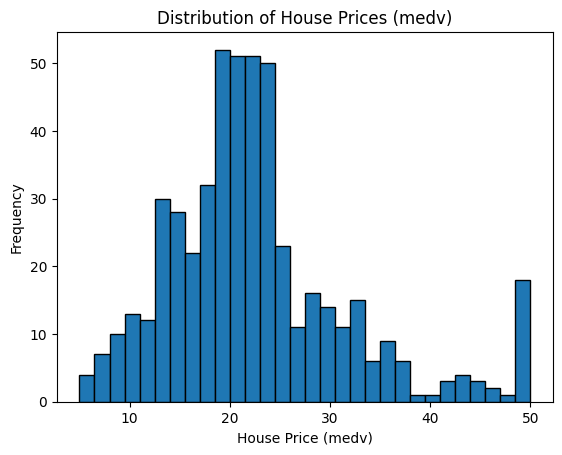

In [3]:
#1
import matplotlib.pyplot as plt
plt.hist(house_prices, bins=30, edgecolor='black')
plt.title('Distribution of House Prices (medv)')
plt.xlabel('House Price (medv)')
plt.ylabel('Frequency')
plt.show()

In [4]:
#2
from scipy.stats import skew

print(f"Skewness: {skew(house_prices)}")

## looks like the data is highly positively skewed

Skewness: 1.104810822864635


In [5]:
from scipy.stats import kurtosis
print(f"Kurtosis: {kurtosis(house_prices)}")

# looks like the data has high kurtosis (heavy tails)

Kurtosis: 1.4686287722747462


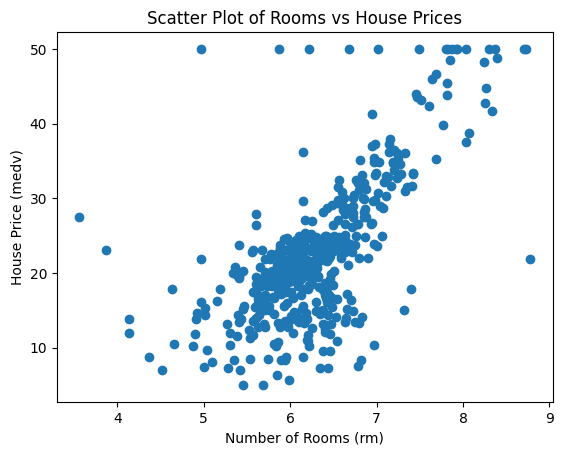

In [7]:
rooms = boston['rm']
plt.scatter(rooms, house_prices)
plt.title('Scatter Plot of Rooms vs House Prices')
plt.xlabel('Number of Rooms (rm)')
plt.ylabel('House Price (medv)')
plt.show()

In [9]:
covarriance = boston[['rm', 'medv']].cov().iloc[0,1]
print(f"Covariance between number of rooms and house prices: {covarriance}")

correlation = boston[['rm', 'medv']].corr().iloc[0,1]
print(f"Correlation between number of rooms and house prices: {correlation}")

Covariance between number of rooms and house prices: 4.493445879544477
Correlation between number of rooms and house prices: 0.6953599470715401


## Sampling methods

1. Random Sampling
    - every individual in the population has an equal chance of being chosen.
    - minimises bias
1. Stratified Sampling
    - Definition: Divide population into strata (groups) based on some characteristic, then sample proportionally from each.
    - Why: Ensures representation of all subgroups.
    - Example: If customers are 60% retail and 40% commercial, sample accordingly.
1. Systematic Sampling
    - Definition: Choose every kth observation from an ordered list (e.g., every 10th customer).
    - Risk: Can introduce bias if there’s periodicity (like if every 10th record is a VIP).
1. Cluster Sampling
    - Definition: Divide into clusters (e.g., branches, cities), randomly select clusters, and include all members from those clusters.
    - Why: Cost-effective when data collection is expensive.
    - Trade-off: Higher sampling error vs. simple random.